In [1]:
import pandas as pd
import datetime

#### Read all the data files

In [2]:
devices = pd.read_csv('/Users/nisha/Downloads/rev-devices.csv')
transactions = pd.read_csv('/Users/nisha/Downloads/transactions.csv')
users = pd.read_csv('/Users/nisha/Downloads/rev-users.csv')
notifications = pd.read_csv('/Users/nisha/Downloads/rev-notifications.csv')

In [3]:
devices.head()

,brand,user_id
0,Android,user_3257
1,Apple,user_6809
2,Android,user_9144
3,Apple,user_3636
4,Android,user_5970


In [4]:
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0
1,user_1,1975,GB,London,2018-01-29 03:38:46.676876,0,STANDARD,NaN,NaN,21,0,0
2,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,STANDARD,0.0,0.0,21,0,0
3,user_3,1994,FR,Paris,2018-01-15 18:47:56.723104,0,STANDARD,1.0,0.0,0,0,0
4,user_4,1985,GB,Beckenham,2018-01-11 00:36:46.673673,0,STANDARD,NaN,NaN,2,0,0


In [5]:
transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1652,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_5509,2019-03-22 05:42:50.316652


In [6]:
notifications.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_7086,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6598,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_4151,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1408,2018-12-11 02:04:46.284683
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_6292,2018-12-14 17:09:58.900808


### Transaction gap

In [17]:
tr = transactions[transactions['transactions_state']=='COMPLETED']

In [18]:
tr.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-19
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-18
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1652,2019-03-22
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_5509,2019-03-22


#### Change the name of user create date to avoid conflict with transaction and notification dates

In [36]:
users['created_date_user'] = users.created_date
del users['created_date']

#### Strip out time from date columns for all data files

In [37]:
users['created_date_user'] = users['created_date_user'].apply(lambda x: datetime.datetime.strptime(str(x)[0:19], '%Y-%m-%d %H:%M:%S').date())


In [7]:
notifications['created_date'] = notifications['created_date'].apply(lambda x: datetime.datetime.strptime(str(x)[0:19], '%Y-%m-%d %H:%M:%S').date())


In [8]:
transactions['created_date'] = transactions['created_date'].apply(lambda x: datetime.datetime.strptime(str(x)[0:19], '%Y-%m-%d %H:%M:%S').date())


In [9]:
transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-19
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-18
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1652,2019-03-22
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_5509,2019-03-22


#### Convert to date time object

In [10]:
notifications['created_date'] = pd.to_datetime(notifications['created_date'])
transactions['created_date'] = pd.to_datetime(transactions['created_date'])

In [11]:
print(len(notifications), len(transactions))

121813 2740075


#### Keep only those users in transactions whose data exists in notifications

In [12]:
uniq_users = list(notifications.user_id.unique())
transactions = transactions[transactions.user_id.isin(uniq_users)]

In [13]:
len(uniq_users)

18953

In [14]:
len(transactions.user_id.unique())

18337

#### Create month and year columns

In [15]:
notifications['year'] = notifications.created_date.apply(lambda x: x.year)
notifications['month'] = notifications.created_date.apply(lambda x: x.month)
transactions['year'] = transactions.created_date.apply(lambda x: x.year)
transactions['month'] = transactions.created_date.apply(lambda x: x.month)

#### Filter out 2019 data, April and May

In [16]:
notifications = notifications[(notifications.year == 2019) & (notifications.month > 3)]
transactions = transactions[(transactions.year == 2019) & (transactions.month > 3)]


In [17]:
print(len(notifications), len(transactions))

3340 434322


In [18]:
uniq_users = list(notifications.user_id.unique())
transactions = transactions[transactions.user_id.isin(uniq_users)]

In [19]:
print(len(notifications), len(transactions))

3340 64942


### Feature Engineering

#### Now, we will create some features into the notifications data based on values from transaction data
#### Example: trans_1db_not == number of transactions happened 1 day before the notification was sent

In [21]:
notifications['trans_1db_not'] = None
notifications['trans_3db_not'] = None
notifications['trans_7db_not'] = None
notifications['trans_15db_not'] = None
notifications['trans_30db_not'] = None
notifications['trans_45db_not'] = None

In [22]:
for uid, dt in zip(notifications.user_id, notifications.created_date):
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()

#### Let's look at the transaction type cardinal counts and create new features for these categories under different time windows

In [23]:
transactions.transactions_type.value_counts()

CARD_PAYMENT    32400
TRANSFER        14225
TOPUP            8440
EXCHANGE         4133
CASHBACK         2881
ATM              1983
FEE               490
CARD_REFUND       302
TAX                66
REFUND             22
Name: transactions_type, dtype: int64

In [24]:
notifications['trans_1db_card_pay_not'] = None
notifications['trans_3db_card_pay_not'] = None
notifications['trans_7db_card_pay_not'] = None
notifications['trans_15db_card_pay_not'] = None
notifications['trans_30db_card_pay_not'] = None
notifications['trans_45db_card_pay_not'] = None

notifications['trans_1db_TRANSFER_not'] = None
notifications['trans_3db_TRANSFER_not'] = None
notifications['trans_7db_TRANSFER_not'] = None
notifications['trans_15db_TRANSFER_not'] = None
notifications['trans_30db_TRANSFER_not'] = None
notifications['trans_45db_TRANSFER_not'] = None

notifications['trans_1db_TOPUP_not'] = None
notifications['trans_3db_TOPUP_not'] = None
notifications['trans_7db_TOPUP_not'] = None
notifications['trans_15db_TOPUP_not'] = None
notifications['trans_30db_TOPUP_not'] = None
notifications['trans_45db_TOPUP_not'] = None

notifications['trans_1db_EXCHANGE_not'] = None
notifications['trans_3db_EXCHANGE_not'] = None
notifications['trans_7db_EXCHANGE_not'] = None
notifications['trans_15db_EXCHANGE_not'] = None
notifications['trans_30db_EXCHANGE_not'] = None
notifications['trans_45db_EXCHANGE_not'] = None

notifications['trans_1db_ATM_not'] = None
notifications['trans_3db_ATM_not'] = None
notifications['trans_7db_ATM_not'] = None
notifications['trans_15db_ATM_not'] = None
notifications['trans_30db_ATM_not'] = None
notifications['trans_45db_ATM_not'] = None

notifications['trans_1db_CASHBACK_not'] = None
notifications['trans_3db_CASHBACK_not'] = None
notifications['trans_7db_CASHBACK_not'] = None
notifications['trans_15db_CASHBACK_not'] = None
notifications['trans_30db_CASHBACK_not'] = None
notifications['trans_45db_CASHBACK_not'] = None

notifications['trans_1db_FEE_not'] = None
notifications['trans_3db_FEE_not'] = None
notifications['trans_7db_FEE_not'] = None
notifications['trans_15db_FEE_not'] = None
notifications['trans_30db_FEE_not'] = None
notifications['trans_45db_FEE_not'] = None

notifications['trans_1db_CARD_REFUND_not'] = None
notifications['trans_3db_CARD_REFUND_not'] = None
notifications['trans_7db_CARD_REFUND_not'] = None
notifications['trans_15db_CARD_REFUND_not'] = None
notifications['trans_30db_CARD_REFUND_not'] = None
notifications['trans_45db_CARD_REFUND_not'] = None

notifications['trans_1db_CARD_TAX_not'] = None
notifications['trans_3db_CARD_TAX_not'] = None
notifications['trans_7db_CARD_TAX_not'] = None
notifications['trans_15db_CARD_TAX_not'] = None
notifications['trans_30db_CARD_TAX_not'] = None
notifications['trans_45db_CARD_TAX_not'] = None

In [25]:
for uid, dt in zip(notifications.user_id, notifications.created_date):
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_card_pay_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_PAYMENT')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_card_pay_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_PAYMENT')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_card_pay_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_PAYMENT')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_card_pay_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_PAYMENT')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_card_pay_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_PAYMENT')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_card_pay_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_PAYMENT')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    
    
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_TRANSFER_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'TRANSFER')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_TRANSFER_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'TRANSFER')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_TRANSFER_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'TRANSFER')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_TRANSFER_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'TRANSFER')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_TRANSFER_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'TRANSFER')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_TRANSFER_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'TRANSFER')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_TOPUP_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'TOPUP')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_TOPUP_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'TOPUP')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_TOPUP_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'TOPUP')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_TOPUP_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'TOPUP')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_TOPUP_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'TOPUP')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_TOPUP_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'TOPUP')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_EXCHANGE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'EXCHANGE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_EXCHANGE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'EXCHANGE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_EXCHANGE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'EXCHANGE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_EXCHANGE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'EXCHANGE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_EXCHANGE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'EXCHANGE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_EXCHANGE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'EXCHANGE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_ATM_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'ATM')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_ATM_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'ATM')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_ATM_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'ATM')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_ATM_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'ATM')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_ATM_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'ATM')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_ATM_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'ATM')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_CASHBACK_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CASHBACK')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_CASHBACK_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CASHBACK')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_CASHBACK_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CASHBACK')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_CASHBACK_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CASHBACK')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_CASHBACK_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CASHBACK')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_CASHBACK_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CASHBACK')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_FEE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'FEE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_FEE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'FEE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_FEE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'FEE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_FEE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'FEE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_FEE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'FEE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_FEE_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'FEE')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_CARD_REFUND_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_REFUND')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_CARD_REFUND_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_REFUND')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_CARD_REFUND_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_REFUND')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_CARD_REFUND_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_REFUND')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_CARD_REFUND_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_REFUND')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_CARD_REFUND_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_REFUND')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_1db_CARD_TAX_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_TAX')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 1))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_3db_CARD_TAX_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_TAX')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 3))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_7db_CARD_TAX_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                  (transactions.transactions_type == 'CARD_TAX')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 7))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_15db_CARD_TAX_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_TAX')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 15))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_30db_CARD_TAX_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_TAX')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 30))]['transaction_id'].count()
    
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_45db_CARD_TAX_not'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                   (transactions.transactions_type == 'CARD_TAX')&
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 45))]['transaction_id'].count()
    
    


In [26]:
notifications.to_csv('/Users/nisha/Desktop/notifications.csv')

#### Also, lets create another feature which is sum of transaction amount for 5 & 10 number of days before the notification was sent

In [27]:
notifications['trans_5db_transaction_amt_sum'] = None
notifications['trans_10db_transaction_amt_sum'] = None
for uid, dt in zip(notifications.user_id, notifications.created_date):
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_5db_transaction_amt_sum'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 5))]['amount_usd'].sum()
 
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_10db_transaction_amt_sum'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                                
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 10))]['amount_usd'].sum()
 

#### Let's add features from transactions states (outbound/inbound) as well

In [28]:
notifications['trans_5db_Outbound'] = None
notifications['trans_10db_Outbound'] = None
notifications['trans_5db_Inbound'] = None
notifications['trans_10db_Inbound'] = None
for uid, dt in zip(notifications.user_id, notifications.created_date):
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_5db_Outbound'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                              (transactions.direction == 'OUTBOUND')&
                                                                                                
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 5))]['transaction_id'].count()
 
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_5db_Inbound'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                             (transactions.direction == 'INBOUND')&
                                                                                                
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 5))]['transaction_id'].count()
 

    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_10db_Outbound'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                               (transactions.direction == 'OUTBOUND')&
                                                                                                
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 10))]['transaction_id'].count()
 
    notifications.loc[(notifications.user_id == uid) & 
                     (notifications.created_date == dt), 'trans_10db_Inbound'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                              (transactions.direction == 'INBOUND')&
                                                                                                
                                                                                        (transactions.created_date <= dt) & 
                                                                                        (transactions.created_date > dt- pd.DateOffset(days = 10))]['transaction_id'].count()
 

In [38]:
notifications.to_csv('/Users/nisha/Desktop/notifications.csv')

#### Now, we will merge the notification data with devices datasets, left outer merge on user id's

In [39]:
merge_1 = pd.merge(notifications, devices, on='user_id', how='left')

#### And another merge with the Users data

In [40]:
merge_2 = pd.merge(merge_1, users, on='user_id', how='left')

In [41]:
merge_2.columns

Index(['reason', 'channel', 'status', 'user_id', 'created_date', 'year',
       'month', 'trans_1db_not', 'trans_3db_not', 'trans_7db_not',
       'trans_15db_not', 'trans_30db_not', 'trans_45db_not',
       'trans_1db_card_pay_not', 'trans_3db_card_pay_not',
       'trans_7db_card_pay_not', 'trans_15db_card_pay_not',
       'trans_30db_card_pay_not', 'trans_45db_card_pay_not',
       'trans_1db_TRANSFER_not', 'trans_3db_TRANSFER_not',
       'trans_7db_TRANSFER_not', 'trans_15db_TRANSFER_not',
       'trans_30db_TRANSFER_not', 'trans_45db_TRANSFER_not',
       'trans_1db_TOPUP_not', 'trans_3db_TOPUP_not', 'trans_7db_TOPUP_not',
       'trans_15db_TOPUP_not', 'trans_30db_TOPUP_not', 'trans_45db_TOPUP_not',
       'trans_1db_EXCHANGE_not', 'trans_3db_EXCHANGE_not',
       'trans_7db_EXCHANGE_not', 'trans_15db_EXCHANGE_not',
       'trans_30db_EXCHANGE_not', 'trans_45db_EXCHANGE_not',
       'trans_1db_ATM_not', 'trans_3db_ATM_not', 'trans_7db_ATM_not',
       'trans_15db_ATM_not', 'tran

#### Let's calculate the number of days since onboard for users

In [42]:
merge_2['created_date_user'] = pd.to_datetime(merge_2['created_date_user'])
merge_2['days_since_onboard'] = (merge_2['created_date'] - merge_2['created_date_user']).dt.days

In [43]:
del merge_2['created_date_user']

In [44]:
#merge_2.head(4)

### Now, we will create ourr target variable. Based on the EDA (95 percentile populations does consecutive transactions in a window of 5 days), we define engaged users who did atleast 1 transaction in a window of 5 days
### So, we look ahead of the notification date, 5 days, and flag 'engagement' columns as 1 if number of transactions >= 1

In [45]:
merge_2['num_trans_5da'] = None
for uid, dt in zip(merge_2.user_id, merge_2.created_date):
    merge_2.loc[(merge_2.user_id == uid) & 
                     (merge_2.created_date == dt), 'num_trans_5da'] = transactions[(transactions.user_id == uid) & 
                                                                                         (transactions.transactions_state == 'COMPLETED')&
                                                                                             
                                                                                                
                                                                                        (transactions.created_date >= dt) & 
                                                                                        (transactions.created_date <= dt + pd.DateOffset(days = 5))]['transaction_id'].count()
 

In [46]:
merge_2['engaged'] = 0
merge_2.loc[merge_2.num_trans_5da >=1, 'engaged'] = 1

In [47]:
#merge_2.head()

In [48]:
del merge_2['num_trans_5da']

In [49]:
merge_2.to_csv('/Users/nisha/Desktop/final_master.csv')

#### Let's convert a string column to float type

In [50]:
merge_2['trans_5db_transaction_amt_sum'] = merge_2['trans_5db_transaction_amt_sum'].astype('float')
merge_2['trans_10db_transaction_amt_sum'] = merge_2['trans_10db_transaction_amt_sum'].astype('float')

#### And check for missing values

In [51]:
merge_2.isnull().sum().sort_values()

reason                                        0
trans_45db_CARD_REFUND_not                    0
trans_30db_CARD_REFUND_not                    0
trans_15db_CARD_REFUND_not                    0
trans_7db_CARD_REFUND_not                     0
trans_3db_CARD_REFUND_not                     0
trans_1db_CARD_REFUND_not                     0
trans_45db_FEE_not                            0
trans_30db_FEE_not                            0
trans_15db_FEE_not                            0
trans_7db_FEE_not                             0
trans_3db_FEE_not                             0
trans_1db_FEE_not                             0
trans_45db_CASHBACK_not                       0
trans_30db_CASHBACK_not                       0
trans_15db_CASHBACK_not                       0
trans_7db_CASHBACK_not                        0
trans_3db_CASHBACK_not                        0
trans_1db_CARD_TAX_not                        0
trans_1db_CASHBACK_not                        0
trans_3db_CARD_TAX_not                  

#### Only two numeric columns with 3 levels has missing. We will treat these two columns as categorical and add 'NA' as the fourth category replacing missing

In [52]:
merge_2 = merge_2.fillna('NA')

#### Let's separate numeric and categorical columns

In [53]:
import numpy as np
num_cols = merge_2.select_dtypes(include=[np.number]).columns

In [54]:
cat_cols = [col for col in merge_2.columns if col not in num_cols]

In [55]:
print(len(cat_cols) + len(num_cols))

86


In [56]:
len(merge_2.columns)

86

In [57]:
cat_cols

['reason',
 'channel',
 'status',
 'user_id',
 'created_date',
 'brand',
 'country',
 'city',
 'plan',
 'attributes_notifications_marketing_push',
 'attributes_notifications_marketing_email']

In [58]:
dummy_df = pd.get_dummies(merge_2[['reason',
 'channel',
 'status',
 'brand',
 'country',
 'city',
 'plan','attributes_notifications_marketing_push', 'attributes_notifications_marketing_email']])

In [59]:
num_cols = [col for col in num_cols if col not in ['attributes_notifications_marketing_push', 'attributes_notifications_marketing_email']]
num_cols

['year',
 'month',
 'trans_1db_not',
 'trans_3db_not',
 'trans_7db_not',
 'trans_15db_not',
 'trans_30db_not',
 'trans_45db_not',
 'trans_1db_card_pay_not',
 'trans_3db_card_pay_not',
 'trans_7db_card_pay_not',
 'trans_15db_card_pay_not',
 'trans_30db_card_pay_not',
 'trans_45db_card_pay_not',
 'trans_1db_TRANSFER_not',
 'trans_3db_TRANSFER_not',
 'trans_7db_TRANSFER_not',
 'trans_15db_TRANSFER_not',
 'trans_30db_TRANSFER_not',
 'trans_45db_TRANSFER_not',
 'trans_1db_TOPUP_not',
 'trans_3db_TOPUP_not',
 'trans_7db_TOPUP_not',
 'trans_15db_TOPUP_not',
 'trans_30db_TOPUP_not',
 'trans_45db_TOPUP_not',
 'trans_1db_EXCHANGE_not',
 'trans_3db_EXCHANGE_not',
 'trans_7db_EXCHANGE_not',
 'trans_15db_EXCHANGE_not',
 'trans_30db_EXCHANGE_not',
 'trans_45db_EXCHANGE_not',
 'trans_1db_ATM_not',
 'trans_3db_ATM_not',
 'trans_7db_ATM_not',
 'trans_15db_ATM_not',
 'trans_30db_ATM_not',
 'trans_45db_ATM_not',
 'trans_1db_CASHBACK_not',
 'trans_3db_CASHBACK_not',
 'trans_7db_CASHBACK_not',
 'trans_15db

### The final dataset

In [100]:
frames = [merge_2[['user_id','created_date']], dummy_df, merge_2[num_cols]]
final_df = pd.concat(frames, axis = 1)

In [101]:
final_df.to_csv('/Users/nisha/Desktop/final_data.csv')

In [102]:
final_df.head(5)

,user_id,created_date,reason_JOINING_ANNIVERSARY,reason_LOST_CARD_ORDER,reason_MADE_MONEY_REQUEST_NOT_SPLIT_BILL,reason_NO_INITIAL_CARD_USE,reason_PREMIUM_ENGAGEMENT_FEES_SAVED,reason_WELCOME_HOME,channel_EMAIL,channel_PUSH,...,trans_10db_Outbound,trans_5db_Inbound,trans_10db_Inbound,birth_year,user_settings_crypto_unlocked,num_contacts,num_referrals,num_successful_referrals,days_since_onboard,engaged
0,user_5157,2019-04-26,0,0,0,1,0,0,1,0,...,0,0,0,1986,0,41,0,0,341,0
1,user_8552,2019-05-01,0,0,0,1,0,0,1,0,...,1,0,0,1988,0,27,0,0,275,0
2,user_4465,2019-05-01,0,0,0,1,0,0,1,0,...,1,0,0,1984,0,0,0,0,376,0
3,user_8643,2019-05-03,0,0,0,1,0,0,1,0,...,0,0,0,1987,0,0,0,0,288,1
4,user_4465,2019-05-02,0,0,0,1,0,0,1,0,...,1,0,0,1984,0,0,0,0,377,0


#### Check for class imbalance

In [103]:
final_df['engaged'].value_counts()

0    1735
1    1605
Name: engaged, dtype: int64

### Let's hit our baseline logistic regression model

In [104]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [105]:
x_train, x_test, y_train, y_test = train_test_split(final_df.loc[:, (final_df.columns != 'user_id')&
                                                                (final_df.columns != 'created_date')&
                                                                (final_df.columns != 'engaged')], final_df['engaged'], random_state=42)






In [106]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
print(lr.coef_)
print(lr.intercept_)

[[-0.18387034  0.19039598  0.16331999 ...  0.          0.
  -0.0008104 ]]
[1.55842174e-07]


In [108]:
y_pred = lr.predict(x_test)
y_pred = [round(value) for value in y_pred]

In [109]:
confusion_matrix(y_test, y_pred)

array([[392,  25],
       [116, 302]], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 83.11%


In [71]:
from sklearn.metrics import roc_auc_score
train_roc = roc_auc_score(y_train, lr.predict_proba(x_train)[:,-1])
test_roc = roc_auc_score(y_test, lr.predict_proba(x_test)[:,-1])
print('train_roc : ', train_roc)
print('test_roc : ', test_roc)

train_roc :  0.9289022580228654
test_roc :  0.9070313127488441


#### Let's push with Xgboost now

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb_clf = XGBClassifier(max_depth=3,n_estimators = 100 )
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [74]:
y_pred = xgb_clf.predict(x_test)
y_pred = [round(value) for value in y_pred]

In [75]:
confusion_matrix(y_test, y_pred)

array([[391,  26],
       [105, 313]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 84.31%


In [77]:
from sklearn.metrics import roc_auc_score
train_roc = roc_auc_score(y_train, xgb_clf.predict_proba(x_train)[:,-1])
test_roc = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,-1])
print('train_roc : ', train_roc)
print('test_roc : ', test_roc)

train_roc :  0.9442876994450502
test_roc :  0.9143316925407042


#### Leaving space for hyper parameter tuning part

In [78]:
from sklearn. model_selection import GridSearchCV
import xgboost as xgb
clf = xgb.XGBClassifier()
parameters = {
    'n_estimators': [100],
    'max_depth': [4,6],
    'subsample': [0.9],
    'colsample_bytree': [0.9]
}

grid = GridSearchCV(clf, parameters, n_jobs = -1, scoring = 'neg_log_loss', cv = 5)

grid.fit(x_train, y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.341955 using {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
-0.344577 (0.020552) with: {'colsample_bytree': 0.9, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
-0.341955 (0.025577) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


#### Maybe a look at the feature importance

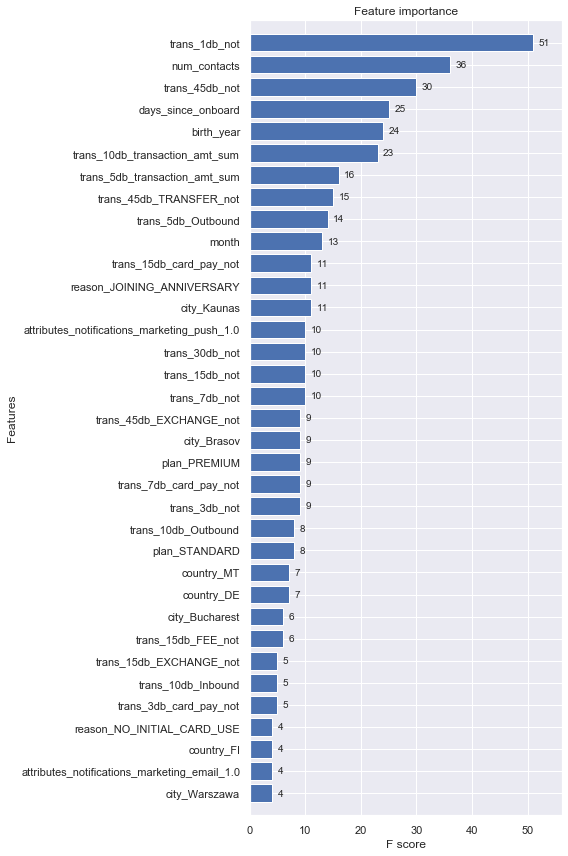

In [79]:
from matplotlib import rcParams
import xgboost as xgb
rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots(figsize=(8,12))
xgb.plot_importance(xgb_clf, max_num_features = 35, height = 0.8, ax = ax)
plt.show()

#### Leaving space for cross validation part

In [81]:
df22 = pd.DataFrame([])

ll2 = list(y_train) + list(y_test)
df22['label'] = ll2

df2 = x_train.append(x_test)

dt2 = xgb.DMatrix(df2, label = df22['label'])

In [82]:
xgb_pars = { 'max_depth':3, 'eval_metric': 'auc', 'booster': 'gbtree', 'objective': 'binary:logistic', 'Silent': True}
classifier_5fold = xgb.cv(xgb_pars, dt2, nfold = 5, stratified=False)


[12:00:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:00:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:00:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:00:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:00:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:00:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[12:00:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [83]:
classifier_5fold

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.897900,0.004228,0.886964,0.014525
1,0.907024,0.004281,0.894397,0.012086
2,0.911075,0.002867,0.898621,0.012370
3,0.912735,0.003356,0.900091,0.012680
4,0.913830,0.002670,0.901518,0.012226
5,0.915627,0.002410,0.903443,0.011436
6,0.916684,0.002125,0.905091,0.011939
7,0.917624,0.002435,0.906245,0.011387
8,0.919288,0.002219,0.906952,0.011145
9,0.920943,0.001965,0.907585,0.011236


#### Leaving space for Rank Ordering/Lift Curve Part

In [84]:
final_df['Predicted_Probability'] = lr.predict_proba(final_df.loc[:, (final_df.columns != 'engaged') &
                                                                 (final_df.columns != 'user_id') &
                                                                 (final_df.columns != 'created_date')])[:, -1]

In [85]:
import numpy as np
trn_prob = np.percentile(final_df['Predicted_Probability'], [x for x in list(range(0, 105, 5))])
trn_prob[0] = 0
trn_prob[-1] = 1

In [86]:
final_df['qbin_win'] = pd.cut(final_df['Predicted_Probability'], trn_prob, duplicates='drop')

In [87]:
(final_df.groupby('qbin_win')['engaged'].sum())/(final_df.groupby('qbin_win')['engaged'].count())

qbin_win
(0.0, 0.09323726793858]                0.041916
(0.09323726793858, 0.1108105003295]    0.035928
(0.1108105003295, 0.1261962225038]     0.029940
(0.1261962225038, 0.1415235009769]     0.083832
(0.1415235009769, 0.1579217398114]     0.107784
(0.1579217398114, 0.1806919837022]     0.149701
(0.1806919837022, 0.2031199326647]     0.167665
(0.2031199326647, 0.2286001128302]     0.191617
(0.2286001128302, 0.262928490527]      0.281437
(0.262928490527, 0.3090464975708]      0.353293
(0.3090464975708, 0.3647735664822]     0.401198
(0.3647735664822, 0.4402670716435]     0.526946
(0.4402670716435, 0.5705861934516]     0.616766
(0.5705861934516, 0.8629245027636]     0.676647
(0.8629245027636, 0.9805559705058]     0.952096
(0.9805559705058, 0.9990157682482]     0.994012
(0.9990157682482, 0.9999845838327]     1.000000
(0.9999845838327, 0.99999998635]       1.000000
(0.99999998635, 0.9999999999999]       1.000000
(0.9999999999999, 1.0]                 1.000000
Name: engaged, dtype: float64

#### Leaving space for churn analysis/churn modelling part

#### Leaving space for Rank Ordering in Churn model part